# Módulo 10 atividade 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(2360873)

In [2]:
base = pd.read_csv(r"C:\Users\Positivo\Desktop\Cursos\Curso Ciencias de dados Ebac\Ciencias de dados\Modulo10descritiva2\Aula1\Profissao- Cientista de Dados_M10_support material.csv")
base.head(5)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [3]:
base.corr()

,Unnamed: 0,index,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
Unnamed: 0,1.000000,-0.001868,0.002567,0.004003,0.015612,-0.004328,-0.002146,0.016628,0.019061,0.007646
index,-0.001868,1.000000,-0.007542,-0.099683,0.039734,-0.047971,-0.034574,0.041818,0.130691,-0.001740
posse_de_veiculo,0.002567,-0.007542,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414
posse_de_imovel,0.004003,-0.099683,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827
qtd_filhos,0.015612,0.039734,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567
idade,-0.004328,-0.047971,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570
tempo_emprego,-0.002146,-0.034574,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235
qt_pessoas_residencia,0.016628,0.041818,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977
mau,0.019061,0.130691,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577
renda,0.007646,-0.001740,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000


Apesar de não ficar muito visual mas a qt_pessoas_residencia tem uma correlação muito forte com a qtd_filhos o que é bastante obvio, o restante realmente não fica muito visial.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

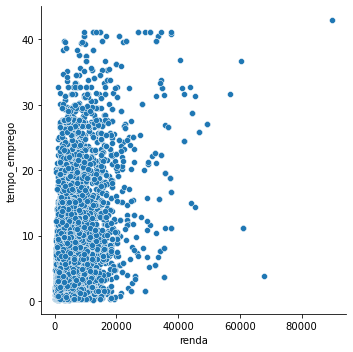

In [4]:
sns.relplot(x=base["renda"],y=base["tempo_emprego"])

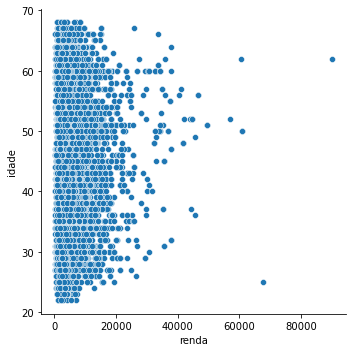

In [5]:
sns.relplot(x="renda",y="idade",data=base)

3) Na su aopinião, há outliers na variável renda?

Acredito que não, tem apenas 1 pessoa que ganha mais de 80 mil que é um empresario

In [10]:
pd.DataFrame(base.groupby(["index","tipo_renda"])["renda"].max().sort_values().tail())

,,renda
index,tipo_renda,
11270,Assalariado,56938.90
1677,Assalariado,60475.59
15750,Empresário,60965.51
10746,Empresário,67794.54
15920,Empresário,89918.04


In [12]:
base[base["renda"]>=89000][["sexo","tipo_renda","idade","renda"]]

,sexo,tipo_renda,idade,renda
9934,F,Empresário,62,89918.04


4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [13]:
base2 = base.copy()

In [15]:
base2["Log"] = np.log(base2["renda"])

In [16]:
base2.tail()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,Log
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29,7.084469
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18,7.831689
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85,7.369506
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39,8.850144
14999,14999,2016-03-01,12895,F,True,True,0,Assalariado,Secundário,Casado,Casa,50,3.049315,2.0,False,993.86,6.901596


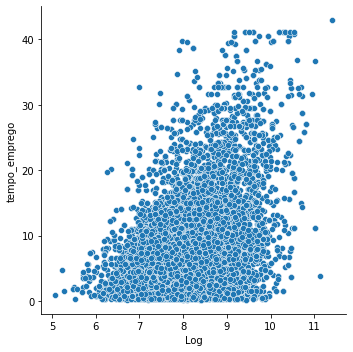

In [17]:
sns.relplot(x=base2["Log"],y=base["tempo_emprego"])

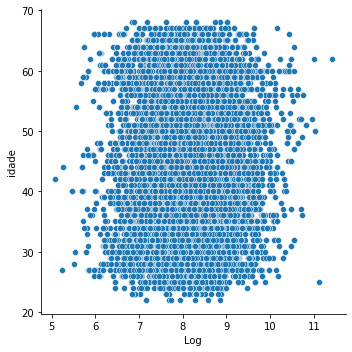

In [18]:
sns.relplot(x="Log",y="idade",data=base2)

In [20]:
pd.DataFrame(base2.groupby(["index","tipo_renda"])["Log"].max().sort_values().tail())

,,Log
index,tipo_renda,
11270,Assalariado,10.949734
1677,Assalariado,11.009995
15750,Empresário,11.018064
10746,Empresário,11.124237
15920,Empresário,11.406654


In [21]:
pd.DataFrame(base2.groupby(["index","tipo_renda"])["Log"].max().sort_values().head())

,,Log
index,tipo_renda,
2646,Assalariado,5.074549
11510,Empresário,5.234792
7358,Assalariado,5.272230
7502,Assalariado,5.473866
4209,Servidor público,5.512339


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Com certeza houve um equilibrio e a analise ficou muito melhor